# Introduction
This kernel has been created by the [Information Systems Lab](http://islab.uom.gr) at the University of Macedonia, Greece for the needs of the elective course Special Topics of Information Systems I at the [Business Administration](http://www.uom.gr/index.php?tmima=2&categorymenu=2) department of the University of Macedonia, Greece.

 <br>

# Objective
The objective of this Kernel is to predict the future behaviour (which products they will buy) based on the features that we have created in our EDA Notebooks.

By the time you finish this example, you will be able to:

Describe the steps of creating a predictive analytics model
Use Python to manipulate ready features
Use Python to create, combine, and delete data tables
Use XGBoost to create a predictive model
Apply the predictive model in order to make a prediction

# Problem Definition
The data that Instacart opened up include orders of 200,000 Instacart users with each user having between 4 and 100 orders. Instacart indicates each order in the data as prior, train or test. Prior orders describe the past behaviour of a user while train and test orders regard the future behaviour that we need to predict. As a result, we want to predict which previously purchased products (prior orders) will be in a user’s next order (train and test orders). For the train orders Instacart reveals the results (i.e. the ordered products) while for the test orders we do not have this piece of information. Moreover, the future order of each user can be either train or test meaning that each user will be either a train or a test user. The setting of the Instacart problem is described in the figure below. 

<img src="https://i.imgur.com/S0Miw3m.png" width="350">

Each user has purchased various products during their prior orders. Moreover, for each user we know the order_id of their future order. The goal is to predict which of these products will be in a user's future order. This is a classification problem because we need to predict whether each pair of user and product is a reorder or not. This is indicated by the value of the reordered variable, i.e. reordered=1 or reordered=0 (see figure below). 

<img src="https://i.imgur.com/SxK2gsR.png" width="350">

As a result we need to come up and calculate various predictor variables (X) that will describe the characteristics of a product and the behaviour of a user regarding one or multiple products. We will do so by analysing the prior orders of the dataset. We will then use the train users to create a predictive model and the test users to make our actual prediction. As a result we create a table as the following one and we train an algorithm based on predictor variables (X) and response variable (Y).

<img src="https://i.imgur.com/Yb1CKAF.png" width="600">

# Method
Our method includes the following steps:
1. <b>Import the ready features from EDA notebooks and reshape data</b>: This step includes loading pkl (pickle) files into pandas DataFrames.
2. <b>Create the test and train DataFrames</b>: In this step we create two distinct DataFrames that will be used in the creation and the use of the predictive model.
4. <b>Create the preditive model</b>: In this step we employ XGBoost algorithm to create the predictive model through the train dataset.
5. <b>Apply the model</b>: This step includes applying the model to predict the 'reordered' variable for the test dataset.

# Business Insights

# Python Skills

# Packages 


# 1. Import packages and data
We import the **time** package to calculate the execution time of our code. <br>
We import the **gc** package to free-up reserved memory by Python.



In [1]:

'''
# import the time package to calculate the execution time of the kernel
import time
#set on start variable the current time
start = time.time()
# run your code and create a new variable with the time
end = time.time()
#substract the start time from end time to calculate the execution time
elapsed = end - start'''

import time
start = time.time()

import pandas as pd # dataframes
import numpy as np # algebra & calculus

import os
print(os.listdir("../input"))
print(os.listdir("../input/instacart-market-basket-analysis"))
print(os.listdir("../input/ml-instacart-f1-0-38-part-one-features"))


import gc #clean-up memory

['instacart-market-basket-analysis', 'ml-instacart-f1-0-38-part-one-features']
['products.csv', 'departments.csv', 'sample_submission.csv', 'order_products__prior.csv', 'order_products__train.csv', 'aisles.csv', 'orders.csv']
['__output__.json', 'uxp.csv', 'uxp.pkl', '__notebook__.ipynb', '__results__.html', 'custom.css']


Now we load the pickle file that contains the prd table with several features that we have created in our EDA notebooks

In [2]:
uxp = pd.read_pickle('../input/ml-instacart-f1-0-38-part-one-features/uxp.pkl')
#uxp = uxp.iloc[0:150000]
uxp.head()

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,5.363636
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,5.363636
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,5.363636
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,5.363636
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,5.363636


In [3]:
'''
#### Remove triple quotes to trim your dataset and experiment with your data
### COMMANDS FOR CODING TESTING - Get 10% of users 
uxp = uxp.loc[uxp.user_id.isin(uxp.user_id.drop_duplicates().sample(frac=0.01, random_state=25))] 
uxp.head()
'''

'\n#### Remove triple quotes to trim your dataset and experiment with your data\n### COMMANDS FOR CODING TESTING - Get 10% of users \nuxp = uxp.loc[uxp.user_id.isin(uxp.user_id.drop_duplicates().sample(frac=0.01, random_state=25))] \nuxp.head()\n'

In addition, we load the original .csv files from Instacart that contains the orders and the products that have ben purchased

In [4]:
orders = pd.read_csv('../input/instacart-market-basket-analysis/orders.csv' )
order_products_train = pd.read_csv('../input/instacart-market-basket-analysis/order_products__train.csv')

#products = pd.read_csv('../input/instacart-market-basket-analysis/products.csv')

We keep only the train and test orders, excluding all the prior orders (these that we used to create our features)

In [5]:
orders_last = orders[(orders.eval_set=='train') | (orders.eval_set=='test') ]

In [6]:
uxp = uxp.merge(orders_last, on='user_id', how='left')
uxp.head(10)

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
2,1,10326.0,1,0.478419,NaN,NaN,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
5,1,13176.0,2,0.288116,NaN,NaN,2,11,2,10,0.200000,0.832555,5.095947,0.007540,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
6,1,14084.0,1,0.370850,NaN,NaN,1,11,1,11,0.090909,0.810982,5.792595,0.005836,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
7,1,17122.0,1,0.472574,NaN,NaN,1,11,5,7,0.142857,0.675576,6.257421,0.010447,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
8,1,25133.0,8,0.419255,4.0,0.8,8,11,3,9,0.888889,0.740155,7.001614,0.004519,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0
9,1,26088.0,2,0.595013,NaN,NaN,2,11,1,11,0.181818,0.539041,6.495838,0.005549,1.0,1.0,1.0,1.0,5.363636,1187899,train,11,4,8,14.0


In [7]:
uxp_train = uxp[uxp.eval_set=='train']

uxp_train = uxp_train.merge(order_products_train, on=['product_id', 'order_id'], how='left' )

uxp_train = uxp_train.drop(['order_id','eval_set', 'add_to_cart_order'], axis=1)
uxp_train = uxp_train.fillna(0)
uxp_train.head(20)

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered
0,1,196.0,10,0.417500,4.0,0.8,10,11,1,11,0.909091,0.776480,3.721774,0.049538,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,1.0
1,1,10258.0,9,0.447038,4.0,0.8,9,11,2,10,0.900000,0.713772,4.277492,0.025180,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,1.0
2,1,10326.0,1,0.478419,0.0,0.0,1,11,5,7,0.142857,0.652009,4.191097,0.020449,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,0.0
3,1,12427.0,10,0.470518,4.0,0.8,10,11,1,11,0.909091,0.740735,4.760037,0.028567,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,0.0
4,1,13032.0,3,0.520218,2.0,0.4,3,11,2,10,0.300000,0.657158,5.622767,0.009064,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,1.0
5,1,13176.0,2,0.288116,0.0,0.0,2,11,2,10,0.200000,0.832555,5.095947,0.007540,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,0.0
6,1,14084.0,1,0.370850,0.0,0.0,1,11,1,11,0.090909,0.810982,5.792595,0.005836,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,0.0
7,1,17122.0,1,0.472574,0.0,0.0,1,11,5,7,0.142857,0.675576,6.257421,0.010447,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,0.0
8,1,25133.0,8,0.419255,4.0,0.8,8,11,3,9,0.888889,0.740155,7.001614,0.004519,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,1.0
9,1,26088.0,2,0.595013,0.0,0.0,2,11,1,11,0.181818,0.539041,6.495838,0.005549,1.0,1.0,1.0,1.0,5.363636,11,4,8,14.0,1.0


In [8]:
uxp_test = uxp[uxp.eval_set=='test']
uxp_test = uxp_test.drop(['eval_set', 'order_id'], axis=1)
uxp_test = uxp_test.fillna(0)
uxp_test.head(20)

,user_id,product_id,uxp_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,Order_Range_D,Order_Ratio_user_id_X_product_id,reorder_ratio,mean_add_to_cart_order,item_first_ratio,item_N2_ratio,item_N3_ratio,item_N4_ratio,item_N5_ratio,order_size_avg,order_number,order_dow,order_hour_of_day,days_since_prior_order
120,3,248.0,1,0.720492,0.0,0.0,1,13,2,12,0.083333,0.400251,10.620782,0.000314,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
121,3,1005.0,1,0.687259,1.0,0.2,1,13,10,4,0.250000,0.440605,9.498920,0.002160,1.0,0.0,0.0,0.0,6.769231,13,5,15,11.0
122,3,1819.0,3,0.653128,0.0,0.0,3,13,4,10,0.300000,0.492162,9.287541,0.000825,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
123,3,7503.0,1,0.616269,0.0,0.0,1,13,3,11,0.090909,0.553551,9.547379,0.002004,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
124,3,8021.0,1,0.559164,0.0,0.0,1,13,2,12,0.083333,0.591157,8.822854,0.001543,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
125,3,9387.0,5,0.530830,0.0,0.0,5,13,1,13,0.384615,0.650427,7.476027,0.006190,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
126,3,12845.0,1,0.742956,0.0,0.0,1,13,4,10,0.100000,0.362920,10.444101,0.000598,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
127,3,14992.0,2,0.572936,0.0,0.0,2,13,6,8,0.250000,0.582820,9.240669,0.001273,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
128,3,15143.0,1,0.641919,0.0,0.0,1,13,1,13,0.076923,0.492022,8.714824,0.002031,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0
129,3,16797.0,3,0.433382,1.0,0.2,3,13,1,13,0.230769,0.698155,7.116096,0.005911,1.0,1.0,1.0,1.0,6.769231,13,5,15,11.0


In [9]:
del uxp
del orders_last
gc.collect()

39

In [10]:
uxp_train = uxp_train.set_index(['user_id', 'product_id'])

'''#BALANCE REORDERED ROWS
uxp_train_bal = uxp_train.copy()
uxp_train_bal = uxp_train_bal[uxp_train_bal.reordered==0].sample(n=uxp_train_bal[uxp_train_bal.reordered==1].shape[0])
uxp_train_bal = pd.concat([uxp_train_bal, uxp_train[uxp_train.reordered==1]])
uxp_train_bal = uxp_train_bal.sample(frac=1)
uxp_train = uxp_train_bal.copy()
print(uxp_train.reordered.value_counts())
del uxp_train_bal
gc.collect()'''


uxp_test = uxp_test.set_index(['user_id', 'product_id'])

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-logloss:0.678315
Will train until train-logloss hasn't improved in 40 rounds.
[5]	train-logloss:0.616474
[10]	train-logloss:0.564815
[15]	train-logloss:0.520899
[20]	train-logloss:0.483698
[25]	train-logloss:0.452524
[30]	train-logloss:0.425303
[35]	train-logloss:0.401727
[40]	train-logloss:0.381392
[45]	train-logloss:0.364122
[50]	train-logloss:0.348885
[55]	train-logloss:0.335767
[60]	train-logloss:0.324401
[65]	train-logloss:0.31429
[70]	train-logloss:0.305491
[75]	train-logloss:0.297799
[80]	train-logloss:0.291159
[85]	train-logloss:0.285315
[90]	train-logloss:0.280242
[95]	train-logloss:0.275883
[100]	train-logloss:0.271912
[105]	train-logloss:0.268525
[110]	train-logloss:0.26558
[115]	train-logloss:0.262961
[120]	train-logloss:0.260638
[125]	train-logloss:0.258684
[130]	train-logloss:0.256928
[135]	train-logloss:0.255455
[140]	train-logloss:0.254092
[145]	train-logloss:0.252889
[150]	train-logloss:0.251826
[155]	train-logloss:0.250912
[160]	train-logloss:0.250092
[165]	

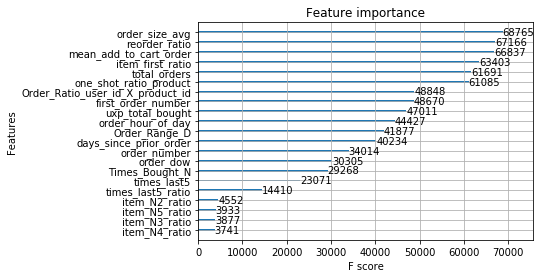

In [11]:
import xgboost
from sklearn.model_selection import train_test_split
uxp_train.loc[:, 'reordered'] = uxp_train.reordered.fillna(0)


# subsample
X_train, X_val, y_train, y_val = train_test_split(uxp_train.drop('reordered', axis=1), uxp_train.reordered,
                                                    test_size=0.2, random_state=42)

'''del uxp_train'''
gc.collect()

d_train = xgboost.DMatrix(X_train, y_train)
param = {'max_depth':10, 
         'eta':0.02,
         'colsample_bytree':0.4,
         'subsample':0.75,
         'silent':1,
         'nthread':27,
         'eval_metric':'logloss',
         'binary':'logistic',
         'tree_method':'hist'
}

watchlist= [(d_train, "train")]
bst = xgboost.train(params=param, dtrain=d_train, num_boost_round=1000, evals=watchlist, early_stopping_rounds=40, verbose_eval=5)
xgboost.plot_importance(bst)

In [12]:
del [X_train, X_val, y_train, y_val]
gc.collect()

22

In [13]:
d_test = xgboost.DMatrix(uxp_test)

uxp_test = uxp_test.reset_index()
uxp_test = uxp_test[['product_id', 'user_id']]

uxp_test["reordered"] = bst.predict(d_test)

del bst

In [14]:
orders_test = orders[orders.eval_set=='test']

In [15]:
uxp_test = uxp_test.merge(orders_test[["user_id", "order_id"]], on='user_id', how='left').drop('user_id', axis=1)
uxp_test.columns = ['product_id', 'prediction', 'order_id']
uxp_test.product_id = uxp_test.product_id.astype(int)
uxp_test.order_id = uxp_test.order_id.astype(int)
uxp_test.head()

,product_id,prediction,order_id
0,248,0.014847,2774568
1,1005,0.047497,2774568
2,1819,0.085672,2774568
3,7503,0.023803,2774568
4,8021,0.026984,2774568


In [16]:
del orders
del orders_test
gc.collect()

53

In [17]:
import numpy as np
from operator import itemgetter

class F1Optimizer():
    def __init__(self):
        pass

    @staticmethod
    def get_expectations(P, pNone=None):
        expectations = []
        P = np.sort(P)[::-1]

        n = np.array(P).shape[0]
        DP_C = np.zeros((n + 2, n + 1))
        if pNone is None:
            pNone = (1.0 - P).prod()

        DP_C[0][0] = 1.0
        for j in range(1, n):
            DP_C[0][j] = (1.0 - P[j - 1]) * DP_C[0, j - 1]

        for i in range(1, n + 1):
            DP_C[i, i] = DP_C[i - 1, i - 1] * P[i - 1]
            for j in range(i + 1, n + 1):
                DP_C[i, j] = P[j - 1] * DP_C[i - 1, j - 1] + (1.0 - P[j - 1]) * DP_C[i, j - 1]

        DP_S = np.zeros((2 * n + 1,))
        DP_SNone = np.zeros((2 * n + 1,))
        for i in range(1, 2 * n + 1):
            DP_S[i] = 1. / (1. * i)
            DP_SNone[i] = 1. / (1. * i + 1)
        for k in range(n + 1)[::-1]:
            f1 = 0
            f1None = 0
            for k1 in range(n + 1):
                f1 += 2 * k1 * DP_C[k1][k] * DP_S[k + k1]
                f1None += 2 * k1 * DP_C[k1][k] * DP_SNone[k + k1]
            for i in range(1, 2 * k - 1):
                DP_S[i] = (1 - P[k - 1]) * DP_S[i] + P[k - 1] * DP_S[i + 1]
                DP_SNone[i] = (1 - P[k - 1]) * DP_SNone[i] + P[k - 1] * DP_SNone[i + 1]
            expectations.append([f1None + 2 * pNone / (2 + k), f1])

        return np.array(expectations[::-1]).T

    @staticmethod
    def maximize_expectation(P, pNone=None):
        expectations = F1Optimizer.get_expectations(P, pNone)

        ix_max = np.unravel_index(expectations.argmax(), expectations.shape)
        max_f1 = expectations[ix_max]

        predNone = True if ix_max[0] == 0 else False
        best_k = ix_max[1]

        return best_k, predNone, max_f1

    @staticmethod
    def _F1(tp, fp, fn):
        return 2 * tp / (2 * tp + fp + fn)

    @staticmethod
    def _Fbeta(tp, fp, fn, beta=1.0):
        beta_squared = beta ** 2
        return (1.0 + beta_squared) * tp / ((1.0 + beta_squared) * tp + fp + beta_squared * fn)


def get_best_prediction(items, preds, pNone=None):
#    print("Maximize F1-Expectation")
#    print("=" * 23)
    items_preds = sorted(list(zip(items, preds)), key=itemgetter(1), reverse=True)
    P = [p for i,p in items_preds]
    L = [i for i,p in items_preds]
    
    opt = F1Optimizer.maximize_expectation(P)
    best_prediction = []
    best_prediction += (L[:opt[0]])
    if best_prediction == []:
        best_prediction = ['None']
            
#    print("Prediction {} yields best E[F1] of {}\n".format(best_prediction, f1_max))
    return ' '.join(list(map(str,best_prediction)))

In [18]:
import pandas as pd
import multiprocessing as mp
import time

#==============================================================================
# load
#==============================================================================
sub_item = uxp_test.groupby(['order_id','product_id']).prediction.mean().reset_index()
sub = sub_item.groupby('order_id').product_id.apply(list).to_frame()
sub['yhat'] = sub_item.groupby('order_id').prediction.apply(list)
sub.reset_index(inplace=True)

del uxp_test, sub_item
gc.collect()

def multi(i):
    if i%1000==0:
        print('{:.3f} min'.format((time.time()-st_time)/60))
    items = sub.loc[i,'product_id']
    preds = sub.loc[i,'yhat']
    ret = get_best_prediction(items, preds)
    return ret

st_time = time.time()
pool = mp.Pool(4)
callback = pool.map(multi, range(sub.shape[0]))

sub['products'] = callback
sub.head()

0.011 min
0.467 min
0.901 min
1.240 min
1.448 min
1.766 min
2.150 min
2.523 min
2.677 min
3.086 min
3.559 min
3.988 min
4.178 min
4.443 min
4.949 min
5.275 min
5.708 min
5.801 min
6.349 min
6.627 min
6.940 min
7.094 min
7.708 min
8.045 min
8.429 min
8.445 min
9.197 min
9.237 min
9.768 min
9.901 min
10.495 min
10.578 min
11.109 min
11.242 min
11.912 min
11.953 min
12.355 min
12.574 min
13.124 min
13.202 min
13.702 min
13.869 min
14.475 min
14.475 min
15.062 min
15.329 min
15.814 min
15.869 min
16.490 min
16.614 min
17.322 min
17.384 min
17.949 min
17.969 min
18.559 min
18.916 min
19.256 min
19.291 min
19.853 min
20.055 min
20.652 min
20.815 min
21.134 min
21.463 min
22.027 min
22.135 min
22.468 min
22.786 min
23.421 min
23.445 min
23.844 min
24.412 min
24.815 min
24.916 min
25.650 min


,order_id,product_id,yhat,products
0,17,"[1283, 6291, 7035, 11494, 13107, 13535, 15613,...","[0.014380186796188354, 0.07299163937568665, 0....",13107 21463 39275 47766
1,34,"[651, 2361, 2596, 4031, 5134, 5242, 6317, 7035...","[0.022160619497299194, 0.03337511420249939, 0....",39475 16083 43504 47766 21137 2596 47792 44663...
2,137,"[311, 1335, 2078, 2326, 2661, 3951, 5025, 5114...","[0.043083012104034424, 0.021319687366485596, 0...",38689 23794 24852 41787 2326 5134 25890
3,182,"[1244, 1757, 2078, 2295, 2480, 3397, 4344, 442...","[0.06032150983810425, 0.024257183074951172, 0....",9337 5479 13629 39275 47672 47209 11520 33000 ...
4,257,"[1025, 2063, 2309, 4605, 4683, 6795, 8277, 103...","[0.18526852130889893, 0.13419875502586365, 0.0...",49235 24852 29837 27966 27104 39475 37646 2847...


In [19]:
sub.reset_index(inplace=True)
sub = sub[['order_id', 'products']]

In [20]:
'''d = dict()
for row in uxp_test.itertuples():
    if row.reordered == 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in uxp_test.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()'''

"d = dict()\nfor row in uxp_test.itertuples():\n    if row.reordered == 1:\n        try:\n            d[row.order_id] += ' ' + str(row.product_id)\n        except:\n            d[row.order_id] = str(row.product_id)\n\nfor order in uxp_test.order_id:\n    if order not in d:\n        d[order] = 'None'\n        \ngc.collect()"

In [21]:
'''sub = pd.DataFrame.from_dict(d, orient='index')
sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
'''

print(sub.shape[0])
print(sub.shape[0]==75000)

sub.to_csv('sub.csv', index=False)

75000
True


In [22]:
print(os.listdir("../working/"))

['__output__.json', 'sub.csv', '__notebook__.ipynb']


In [23]:
submission = pd.read_csv("../working/sub.csv")
submission.head()

,order_id,products
0,17,13107 21463 39275 47766
1,34,39475 16083 43504 47766 21137 2596 47792 44663...
2,137,38689 23794 24852 41787 2326 5134 25890
3,182,9337 5479 13629 39275 47672 47209 11520 33000 ...
4,257,49235 24852 29837 27966 27104 39475 37646 2847...


In [24]:
submission.shape[0]

75000

In [25]:
end = time.time()
elapsed = end - start
elapsed

5779.171803474426